<a href="https://colab.research.google.com/github/Rohit0911/HandWritten_Digits_Classifier/blob/main/Mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [70]:
X_test[0].shape

(28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Now we can print or find the number fromm pixel values suing Matplotlib

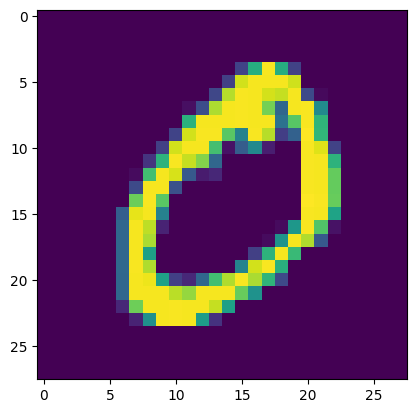

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
#plt.imshow(X_train[9])


Now we have to bring the pixel values in the 0 and 1 from because when we train neural networks the more similar values the more accurate is the weights

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]  #All values are between 0 to 1 fro our convenience

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
model=Sequential()
#In our model we've to give value of 784 in first layer
#So we flatten the data by converting it from 2d to 1d

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [49]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2949 - accuracy: 0.9140 - val_loss: 0.1529 - val_accuracy: 0.9541
Epoch 2/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1275 - accuracy: 0.9623 - val_loss: 0.1165 - val_accuracy: 0.9644
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.0987 - val_accuracy: 0.9696
Epoch 4/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.1049 - val_accuracy: 0.9676
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0972 - val_accuracy: 0.9715
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0953 - val_accuracy: 0.9726
Epoch 7/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0961 - val_accurac

In [55]:
y_proba = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
y_pred=y_proba.argmax(axis=1)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)  #We get Accuracy of 97.54 %

0.9716

In [59]:
#THe above accuracy can be improved by various methods
# Add more layers, increase the number of epochs
#IF the accuracy is not improving then there is overfitting


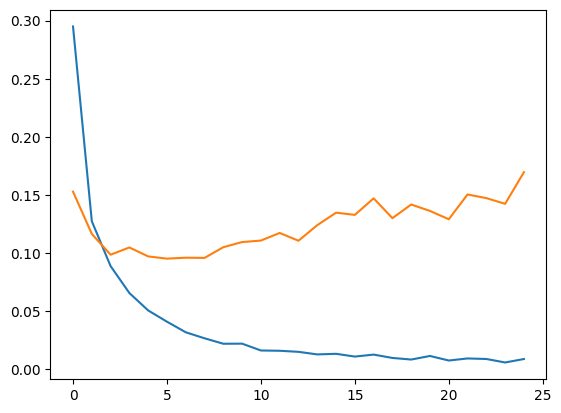

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

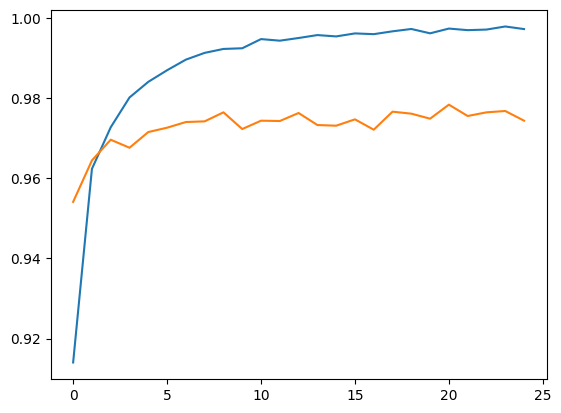

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

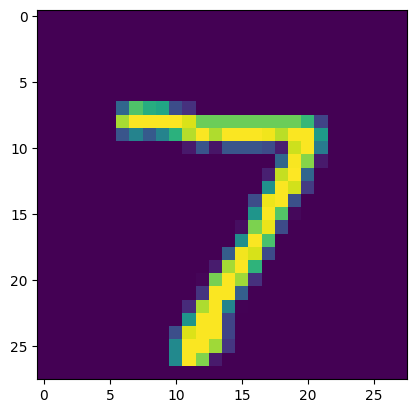

In [63]:
plt.imshow(X_test[0])

In [64]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)  #This is the output

1/1 [==============================] - 0s 38ms/step


array([7])

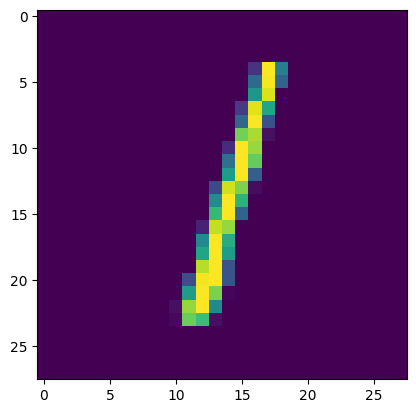

In [65]:
plt.imshow(X_test[2])

In [66]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)  #This is the output

1/1 [==============================] - 0s 39ms/step


array([1])